# Analisis exploratorio con Topic Modeling

#### Fernando Ruiz

Este notebook muestra una manera de extraer noticias desde el motor de búsqueda de _Sophia_, a partir de una **palabra clave**, un **país** y un **periodo de tiempo**.


_Sophia_ es un proyecto I+i+D desarrollado en la Universidad Austral de Chile desde 2019. El motor de búsqueda se encuentra en fase de mejoramiento continuo. Por cualquier pregunta o problema técnica con este notebook, no dudar en contactarme por Discord (@MatthieuVernier) o por correo mvernier@inf.uach.cl.

In [22]:
import elasticsearch
from datetime import datetime

## 1. Parámetros de la búsqueda

Características del motor de búsqueda:  
- El formato de las fechas es: YYYY-MM-DD
- El motor de búsqueda incluye noticias por distintos paises, pero se recomienda utilizar "chile" por el momento.
- El motor de búsqueda incluye datos entre el año 2000 y el año 2021.

### Se utilizaron noticias entre las fechas 01/12/2021 y 15/12/2021

In [232]:
country="chile"
from_="2021-12-01"
to_="2021-12-15"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

keyword=""
simple_keyword=False

In [90]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"

In [91]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

In [92]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 
      #"must": [
      #  {match: { "text":keyword}}

      #],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

In [93]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 3032 noticias encontradas...


In [94]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date}
    
    df = df.append(new_row, ignore_index=True)

df

,id_news,country,media_outlet,url,title,text,date
0,21887909.0,chile,radiosago,https://www.radiosago.cl/carabineros-detiene-a...,Carabineros detiene a 5 personas por millonari...,En un operativo realizado por diferentes unida...,2021-12-02
1,21887420.0,chile,radiosago,https://www.radiosago.cl/padres-de-menores-ata...,Padres de menores atacados con un machete por ...,Hasta el edificio de la Fiscalía Regional de ...,2021-12-09
2,21887487.0,chile,radiosago,https://www.radiosago.cl/municipalidad-de-puer...,Municipalidad de Puerto Montt perfeccionará Pr...,Para continuar avanzando en la preservación de...,2021-12-12
3,21887488.0,chile,radiosago,https://www.radiosago.cl/hospital-puerto-montt...,Hospital Puerto Montt incrementará prestacione...,Durante la actual pandemia el Hospital Puerto ...,2021-12-12
4,21887490.0,chile,radiosago,https://www.radiosago.cl/servicio-de-salud-rel...,Servicio de Salud Reloncaví solicita hacer un ...,Ante el sostenido aumento de la demanda por lo...,2021-12-08
...,...,...,...,...,...,...,...
3027,47588344.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/becas/desc...,Descubre cómo financiar tu educación superior,"Cada año en nuestro país, son muchos los jóven...",2021-12-06
3028,47588146.0,chile,elvacanudo,https://www.elvacanudo.cl/noticia/educacion/de...,De norte a sur: VTR conectará a más de un mill...,Con el propósito de seguir reduciendo la brech...,2021-12-13
3029,47588178.0,chile,elvacanudo,https://www.elvacanudo.cl/noticia/becas/descub...,Descubre cómo financiar tu educación superior,"Cada año en nuestro país, son muchos los jóven...",2021-12-06
3030,47588338.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/cae/los-de...,Los desencuentros entre los programas educacio...,¿Cómo se abordarán en un eventual gobierno las...,2021-12-13


In [95]:
df['url'].duplicated().any()

True

In [96]:
df = df.drop_duplicates(subset='url', keep='first')

In [97]:
df

,id_news,country,media_outlet,url,title,text,date
0,21887909.0,chile,radiosago,https://www.radiosago.cl/carabineros-detiene-a...,Carabineros detiene a 5 personas por millonari...,En un operativo realizado por diferentes unida...,2021-12-02
1,21887420.0,chile,radiosago,https://www.radiosago.cl/padres-de-menores-ata...,Padres de menores atacados con un machete por ...,Hasta el edificio de la Fiscalía Regional de ...,2021-12-09
2,21887487.0,chile,radiosago,https://www.radiosago.cl/municipalidad-de-puer...,Municipalidad de Puerto Montt perfeccionará Pr...,Para continuar avanzando en la preservación de...,2021-12-12
3,21887488.0,chile,radiosago,https://www.radiosago.cl/hospital-puerto-montt...,Hospital Puerto Montt incrementará prestacione...,Durante la actual pandemia el Hospital Puerto ...,2021-12-12
4,21887490.0,chile,radiosago,https://www.radiosago.cl/servicio-de-salud-rel...,Servicio de Salud Reloncaví solicita hacer un ...,Ante el sostenido aumento de la demanda por lo...,2021-12-08
...,...,...,...,...,...,...,...
3027,47588344.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/becas/desc...,Descubre cómo financiar tu educación superior,"Cada año en nuestro país, son muchos los jóven...",2021-12-06
3028,47588146.0,chile,elvacanudo,https://www.elvacanudo.cl/noticia/educacion/de...,De norte a sur: VTR conectará a más de un mill...,Con el propósito de seguir reduciendo la brech...,2021-12-13
3029,47588178.0,chile,elvacanudo,https://www.elvacanudo.cl/noticia/becas/descub...,Descubre cómo financiar tu educación superior,"Cada año en nuestro país, son muchos los jóven...",2021-12-06
3030,47588338.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/cae/los-de...,Los desencuentros entre los programas educacio...,¿Cómo se abordarán en un eventual gobierno las...,2021-12-13


In [99]:
noticias = df.text.values.tolist()

- Utilizaremos spacy para procesar textos en español 
- Utilizaremos Gensim (para el análisis de tópicos) y pyLDAvis (para visualizar los tópicos)

In [100]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_md")
matcher = Matcher(nlp.vocab)

In [101]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

Procesaremos todas las noticias para representarlas como una lista de:
- sustantivos (NOUN)
- y conceptos claves (NOUN-de-NOUN) y (NOUN-ADJ)
- entidades (PER) y (ORG)

- Agregamos patrones para buscar conceptos claves

In [102]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

- Definemos una función para preprocesar una noticia y transformarla en una lista de "palabras" relevantes.

In [103]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

- Transformamos todas las noticias de nuestro corpus "noticias" aplicando la función "text_to_list". De cierta manera, simplificará el texto guardando solamente las palabras y conceptos importantes.

In [108]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### 3.2.4 Preparar los datos de entrada de LDA

los datos de entrada de LDA son: 
- un diccionario (variable 'id2word')
- nuestro dataset preprocesado ('noticias_procesadas')

In [113]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [114]:
texts = noticias_procesadas

In [115]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]


### ¿Cómo encontrar cuál es el mejor número de tópicos para describir el dataset?

- Queremos encontrar el modelo que optimiza la métrica de coherencia (o minimiza la métrica de perplejidad). Probaremos con distintos valores de número de tópicos.

In [116]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)

        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                                id2word=id2word,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

        model_list.append(model)

        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

- Entrenaremos modelos desde 2 tópicos hasta 10 tópicos con un salto de 2 


In [117]:
start=2
limit=10
step=2

In [118]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
hola1
hola2
hola
4
hola1
hola2
hola
6
hola1
hola2
hola
8
hola1
hola2
hola


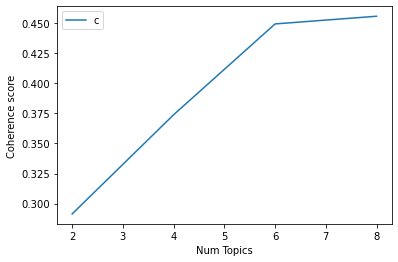

In [119]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

- El número optimo de tópicos son 6 según el gráfico

In [120]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

- Visualizemos el modelo de tópicos

In [121]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

/home/fernando/miniconda3/envs/info147/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.220918  0.038929       1        1  26.239533
2     -0.096526  0.057231       2        1  21.694767
0     -0.035102 -0.238071       3        1  17.505426
3      0.119983 -0.055232       4        1  13.194469
1      0.036815  0.164823       5        1  12.347868
5      0.195748  0.032320       6        1   9.017937, topic_info=           Term        Freq       Total Category  logprob  loglift
92        casos  261.000000  261.000000  Default  30.0000  30.0000
2960  candidato  221.000000  221.000000  Default  29.0000  29.0000
108    incendio  204.000000  204.000000  Default  28.0000  28.0000
3           año  661.000000  661.000000  Default  27.0000  27.0000
2919   variante  161.000000  161.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
91         caso   38.187741  262.737134   Topic6  -5.7935   0.4773
97         días   37.516625  281.625831   Topic6  -5.8112   0.3902
57     personas   42.366547  796.556786   Topic6  -5.6896  -0.5280
383       tanto   36.319191  271.775218   Topic6  -5.8437   0.3933
118       lugar   34.164861  324.120239   Topic6  -5.9048   0.1560

[399 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
189       1  0.086908                 $
189       2  0.908580                 $
1045      5  0.988363  Camilo Henríquez
3531      6  0.970259         Colo Colo
4835      4  0.967757     Franco Parisi
...     ...       ...               ...
389       2  0.004786              zona
389       5  0.272807              zona
389       6  0.071791              zona
738       1  0.929579             áreas
738       3  0.054681             áreas

[649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2, 6])

- Buscamos las comunas de la region de Los Lagos en el dataset y las guardamos en el dataframe

In [122]:
from spacy.matcher import PhraseMatcher

In [123]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco de Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los Muermos","Maullín","Puerto Montt",
          "Puerto Varas","Osorno","Puerto Octay",
          "Purranque","Puyehue","Río Negro",
           "San Juan de la Costa","San Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

In [124]:
dataset_cities = df

for city in cities:
    dataset_cities.insert(7,city.replace(" ","_"),0)

In [125]:
dataset_cities

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quinchao,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud
0,21887909.0,chile,radiosago,https://www.radiosago.cl/carabineros-detiene-a...,Carabineros detiene a 5 personas por millonari...,En un operativo realizado por diferentes unida...,2021-12-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21887420.0,chile,radiosago,https://www.radiosago.cl/padres-de-menores-ata...,Padres de menores atacados con un machete por ...,Hasta el edificio de la Fiscalía Regional de ...,2021-12-09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21887487.0,chile,radiosago,https://www.radiosago.cl/municipalidad-de-puer...,Municipalidad de Puerto Montt perfeccionará Pr...,Para continuar avanzando en la preservación de...,2021-12-12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21887488.0,chile,radiosago,https://www.radiosago.cl/hospital-puerto-montt...,Hospital Puerto Montt incrementará prestacione...,Durante la actual pandemia el Hospital Puerto ...,2021-12-12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21887490.0,chile,radiosago,https://www.radiosago.cl/servicio-de-salud-rel...,Servicio de Salud Reloncaví solicita hacer un ...,Ante el sostenido aumento de la demanda por lo...,2021-12-08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,47588344.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/becas/desc...,Descubre cómo financiar tu educación superior,"Cada año en nuestro país, son muchos los jóven...",2021-12-06,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3028,47588146.0,chile,elvacanudo,https://www.elvacanudo.cl/noticia/educacion/de...,De norte a sur: VTR conectará a más de un mill...,Con el propósito de seguir reduciendo la brech...,2021-12-13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3029,47588178.0,chile,elvacanudo,https://www.elvacanudo.cl/noticia/becas/descub...,Descubre cómo financiar tu educación superior,"Cada año en nuestro país, son muchos los jóven...",2021-12-06,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3030,47588338.0,chile,elrepuertero,https://www.elrepuertero.cl/noticia/cae/los-de...,Los desencuentros entre los programas educacio...,¿Cómo se abordarán en un eventual gobierno las...,2021-12-13,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

In [127]:
for index,row in dataset_cities.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index,span.text.replace(" ","_")]=1
    except Exception as e:
        print(e)
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [72]:
from pandasql import sqldf 

In [129]:
result = sqldf("SELECT sum(Ancud),sum(Castro),sum(Chonchi),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Puqueldón),sum(Queilén),sum(Quemchi),sum(Quellón),sum(Quinchao),sum(Calbuco),sum(Cochamó),sum(Fresia),sum(Frutillar),sum(Llanquihue),sum(Los_Muermos),sum(Maullín),sum(Puerto_Montt),sum(Puerto_Varas),sum(Osorno),sum(Puerto_Octay),sum(Purranque),sum(Puyehue),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo),sum(Chaitén),sum(Futaleufú),sum(Hualaihué),sum(Palena) FROM dataset_cities")
result

,sum(Ancud),sum(Castro),sum(Chonchi),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Puqueldón),sum(Queilén),sum(Quemchi),sum(Quellón),sum(Quinchao),...,sum(Puerto_Octay),sum(Purranque),sum(Puyehue),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo),sum(Chaitén),sum(Futaleufú),sum(Hualaihué),sum(Palena)
0,90,169,48,27,51,13,0,19,44,31,...,31,29,28,20,17,19,14,15,25,40


- Podemos analizar cuál es el tópico principal de cada documento

In [130]:
def format_topics_documents(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(lda_model, dataset, noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.8698,"año, personas, años, diciembre, niños, millone...",En un operativo realizado por diferentes unida...
1,1,3.0,0.5344,"candidato, José Antonio Kast, Gabriel Boric, d...",Hasta el edificio de la Fiscalía Regional de ...
2,2,4.0,0.3849,"parte, proyecto, comunidad, familias, comuna, ...",Para continuar avanzando en la preservación de...
3,3,1.0,0.5941,"incendio, personas, viviendas, ayuda, lugar, v...",Durante la actual pandemia el Hospital Puerto ...
4,4,3.0,0.8278,"candidato, José Antonio Kast, Gabriel Boric, d...",Ante el sostenido aumento de la demanda por lo...
...,...,...,...,...,...
1131,1131,2.0,0.6388,"año, personas, años, diciembre, niños, millone...","Cada año en nuestro país, son muchos los jóven..."
1132,1132,4.0,0.7656,"parte, proyecto, comunidad, familias, comuna, ...",Con el propósito de seguir reduciendo la brech...
1133,1133,2.0,0.6388,"año, personas, años, diciembre, niños, millone...","Cada año en nuestro país, son muchos los jóven..."
1134,1134,0.0,0.5799,"educación, años, estudiantes, historia, mundo,...",¿Cómo se abordarán en un eventual gobierno las...


- Añadiremos columnas con las ciudades  para saber de qué ciudad de habla en cada noticia

In [131]:
 df_cities = df.iloc[:,7:38] 

In [132]:
df_cities = df_cities.reset_index(drop=True)

In [133]:
df_dominant_topic=pd.concat([df_dominant_topic,df_cities],axis=1)


In [147]:
df_dominant_topic.tail(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Palena,Hualaihué,Futaleufú,Chaitén,San_Pablo,...,Quinchao,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud
1126,1126,0.0,0.9328,"educación, años, estudiantes, historia, mundo,...",El reconocido actor y dramaturgo chileno pres...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1127,1127,4.0,0.9626,"parte, proyecto, comunidad, familias, comuna, ...",Ante la verdadera plaga de carros de supermerc...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128,1128,4.0,0.8637,"parte, proyecto, comunidad, familias, comuna, ...","Iniciativa público privada entre el municipio,...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1129,1129,4.0,0.8209,"parte, proyecto, comunidad, familias, comuna, ...",Este nuevo modelo será utilizado para el estud...,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1130,1130,0.0,0.5799,"educación, años, estudiantes, historia, mundo,...",¿Cómo se abordarán en un eventual gobierno las...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,1131,2.0,0.6388,"año, personas, años, diciembre, niños, millone...","Cada año en nuestro país, son muchos los jóven...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,1132,4.0,0.7656,"parte, proyecto, comunidad, familias, comuna, ...",Con el propósito de seguir reduciendo la brech...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1133,1133,2.0,0.6388,"año, personas, años, diciembre, niños, millone...","Cada año en nuestro país, son muchos los jóven...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,1134,0.0,0.5799,"educación, años, estudiantes, historia, mundo,...",¿Cómo se abordarán en un eventual gobierno las...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1135,1135,4.0,0.7656,"parte, proyecto, comunidad, familias, comuna, ...",Con el propósito de seguir reduciendo la brech...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
result = sqldf("SELECT Dominant_Topic, Ancud, Castro, Chonchi, Curaco_de_Vélez, Dalcahue, Puqueldón, Queilén,Quemchi, Quellón,Quinchao, Calbuco, Cochamó , Fresia, Frutillar, Llanquihue, Los_Muermos, Maullín, Puerto_Montt, Puerto_Varas, Osorno,Puerto_Octay,Purranque, Puyehue, Río_Negro, San_Juan_de_la_Costa,  San_Pablo,  Chaitén, Futaleufú, Hualaihué, Palena  FROM df_dominant_topic")

result

,Dominant_Topic,Ancud,Castro,Chonchi,Curaco_de_Vélez,Dalcahue,Puqueldón,Queilén,Quemchi,Quellón,...,Puerto_Octay,Purranque,Puyehue,Río_Negro,San_Juan_de_la_Costa,San_Pablo,Chaitén,Futaleufú,Hualaihué,Palena
0,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1133,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
data = {'t0':[],'t1':[],'t2':[],'t3':[],'t4':[],'t5':[]}

df_by_media = pd.DataFrame(data)  
  
df_by_media

,t0,t1,t2,t3,t4,t5


In [151]:
for i, row_list in enumerate(lda_model[dataset]):
    
    t0=0
    t1=0
    t2=0
    t3=0
    t4=0
    t5=0
    
    for topic in row_list[0]:
        key=topic[0]
        value=topic[1]
        
        if key == 0:
            t0 = value
        if key == 1:
            t1 = value
        if key == 2:
            t2 = value
        if key == 3:
            t3 = value
        if key == 4:
            t4 = value
        if key == 5:
            t5 = value

            
    new_row = {'t0':t0,'t1':t1,'t2':t2,'t3':t3,'t4':t4,'t5':t5}
    df_by_media = df_by_media.append(new_row, ignore_index=True)


In [152]:
df_by_media

,t0,t1,t2,t3,t4,t5
0,0.000000,0.111049,0.869794,0.000000,0.012939,0.000000
1,0.000000,0.269084,0.177078,0.534429,0.015051,0.000000
2,0.310870,0.060678,0.237340,0.000000,0.384895,0.000000
3,0.000000,0.594101,0.030222,0.000000,0.308271,0.061491
4,0.000000,0.000000,0.011988,0.827777,0.077521,0.078187
...,...,...,...,...,...,...
1131,0.182936,0.000000,0.638760,0.000000,0.171197,0.000000
1132,0.041429,0.000000,0.190025,0.000000,0.765568,0.000000
1133,0.182948,0.000000,0.638748,0.000000,0.171197,0.000000
1134,0.579945,0.000000,0.060219,0.101725,0.257130,0.000000


In [153]:
final=df_by_media.join(result)

In [154]:
final

,t0,t1,t2,t3,t4,t5,Dominant_Topic,Ancud,Castro,Chonchi,...,Puerto_Octay,Purranque,Puyehue,Río_Negro,San_Juan_de_la_Costa,San_Pablo,Chaitén,Futaleufú,Hualaihué,Palena
0,0.000000,0.111049,0.869794,0.000000,0.012939,0.000000,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.269084,0.177078,0.534429,0.015051,0.000000,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.310870,0.060678,0.237340,0.000000,0.384895,0.000000,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.594101,0.030222,0.000000,0.308271,0.061491,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.000000,0.011988,0.827777,0.077521,0.078187,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0.182936,0.000000,0.638760,0.000000,0.171197,0.000000,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,0.041429,0.000000,0.190025,0.000000,0.765568,0.000000,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1133,0.182948,0.000000,0.638748,0.000000,0.171197,0.000000,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1134,0.579945,0.000000,0.060219,0.101725,0.257130,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Hacemos consulta para saber de que topicos se hablan en las distintas ciudades

In [183]:
def consulta(comuna):
    result1 = sqldf(
        "SELECT "+comuna+",t0,t1,t2,t3,t4,t5, Dominant_Topic  FROM final WHERE "+comuna+"==1")

    result2 = sqldf(
        "SELECT " +comuna+", avg(t0),avg(t1),avg(t2),avg(t3),avg(t4), avg(t5) FROM result1 GROUP BY " +comuna+"")  # ORDER BY `Puerto Montt` ASC")

    return result2

In [185]:
consulta('Ancud')

,Ancud,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.143636,0.151243,0.206866,0.070769,0.239315,0.182265


- Lo anterior refleja que en la ciudad de Ancud se habla más del topico 4

In [190]:
consulta('Castro')

,Castro,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.07141,0.320905,0.19026,0.043101,0.248248,0.119955


In [192]:
consulta('Chonchi')

,Chonchi,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.060888,0.207076,0.187886,0.038553,0.307447,0.192131


In [194]:
consulta('Curaco_de_Vélez')

,Curaco_de_Vélez,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.048435,0.213277,0.186404,0.034483,0.338071,0.174595


In [195]:
consulta('Dalcahue')

,Dalcahue,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.055186,0.251248,0.199889,0.043669,0.189727,0.253371


In [196]:
consulta('Puqueldón')

,Puqueldón,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.131283,0.129538,0.173691,0.008555,0.23335,0.318885


In [201]:
consulta('Quemchi')

,Quemchi,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.040463,0.138511,0.187113,0.035361,0.223779,0.367928


In [202]:
consulta('Quellón')

,Quellón,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.082866,0.14251,0.22758,0.049618,0.231608,0.260181


In [203]:
consulta('Quinchao')

,Quinchao,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.129143,0.152678,0.164201,0.019482,0.315094,0.212907


In [204]:
consulta('Calbuco')

,Calbuco,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.026597,0.177116,0.21964,0.0803,0.198057,0.290884


In [205]:
consulta('Cochamó')

,Cochamó,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.03564,0.001033,0.1747,0.00971,0.384873,0.386244


In [206]:
consulta('Fresia')

,Fresia,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.014315,0.065422,0.261843,0.038515,0.222655,0.38897


In [207]:
consulta('Frutillar')

,Frutillar,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.114525,0.055447,0.2053,0.040927,0.206541,0.370466


In [209]:
consulta('Llanquihue')

,Llanquihue,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.096482,0.137503,0.246827,0.062818,0.264842,0.186005


In [211]:
consulta('Los_Muermos')

,Los_Muermos,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.0,0.063627,0.197394,0.020192,0.205294,0.50356


In [212]:
consulta('Maullín')

,Maullín,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.149854,0.14117,0.252281,0.018845,0.339697,0.094153


In [213]:
consulta('Puerto_Montt')

,Puerto_Montt,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.081061,0.206656,0.247278,0.079582,0.258691,0.12112


In [214]:
consulta('Puerto_Varas')

,Puerto_Varas,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.047698,0.144597,0.267763,0.029761,0.348447,0.155152


In [215]:
consulta('Osorno')

,Osorno,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.051261,0.185374,0.323614,0.069858,0.230255,0.13272


In [217]:
consulta('Puerto_Octay')

,Puerto_Octay,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.049828,0.173682,0.180843,0.009955,0.310957,0.267016


In [218]:
consulta('Purranque')

,Purranque,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.028334,0.086312,0.225221,0.040575,0.23832,0.372676


In [219]:
consulta('Puyehue')

,Puyehue,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.027925,0.053775,0.347275,0.020729,0.238692,0.302116


In [223]:
consulta('Río_Negro')

,Río_Negro,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.021069,0.064142,0.249079,0.019013,0.239172,0.39802


In [224]:
consulta('San_Juan_de_la_Costa')

,San_Juan_de_la_Costa,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.051414,0.244653,0.269562,0.135609,0.197474,0.096089


In [225]:
consulta('San_Pablo')

,San_Pablo,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.039542,0.053055,0.236704,0.044881,0.138102,0.478159


In [226]:
consulta('Chaitén')

,Chaitén,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.029677,0.03411,0.261651,0.005706,0.371762,0.289574


In [227]:
consulta('Futaleufú')

,Futaleufú,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.13264,0.072112,0.231502,0.019542,0.445942,0.093403


In [228]:
consulta('Hualaihué')

,Hualaihué,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.046043,0.025057,0.173983,0.316856,0.223818,0.209707


In [229]:
consulta('Palena')

,Palena,avg(t0),avg(t1),avg(t2),avg(t3),avg(t4),avg(t5)
0,1,0.061077,0.039963,0.15541,0.213434,0.313251,0.211387
